# MotionBERT: A Unified Perspective on Learning Human Motion Representations

## Cloning the MotionBERT GitHub Repository

In [1]:
# This cell runs the git command to load the MotionBERT github repo into the colab directory named "content" by default

%cd /content/
!git clone https://huggingface.co/walterzhu/MotionBERT

/content
Cloning into 'MotionBERT'...
remote: Enumerating objects: 108, done.
remote: Total 108 (delta 0), reused 0 (delta 0), pack-reused 108 (from 1)
Receiving objects: 100% (108/108), 71.39 KiB | 11.90 MiB/s, done.
Resolving deltas: 100% (22/22), done.
Filtering content: 100% (10/10), 1.28 GiB | 44.27 MiB/s, done.


## Cloning the AlphaPose GitHub Repository

In [8]:
# This cell runs the git command to load the AlphaPose github repo into the colab directory named "content" by default

%cd /content/
!git clone https://github.com/MVIG-SJTU/AlphaPose.git

/content
Cloning into 'AlphaPose'...
remote: Enumerating objects: 2749, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 2749 (delta 4), reused 1 (delta 0), pack-reused 2739
Receiving objects: 100% (2749/2749), 118.82 MiB | 27.29 MiB/s, done.
Resolving deltas: 100% (1379/1379), done.


## Installing Required Libraries

In [3]:
# Uncommenting the below lines and running the whole cell runs the shell commands to install the mentioned libraries

! pip install -q pyyaml==6.0
# ! pip install scipy==1.1.0
# ! pip install torch==1.2.0 torchvision==0.4.0
# ! pip install pillow==6.2.2

# The below lines are used to import the installed libraries and print their versions
import torch
import yaml, scipy

print(torch.__version__)
print(yaml.__version__)
print(scipy.__version__)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 682.2/682.2 kB 10.2 MB/s eta 0:00:00
2.2.1+cu121
6.0
1.11.4


## Check for CUDA Availability and Set Device

In [4]:
# Check if a CUDA-compatible GPU is available
if torch.cuda.is_available():
    # If a GPU is available, set the default device to the first GPU (device 0)
    torch.cuda.set_device(0)
    # Print a message indicating that the GPU is being used
    print("GPU is available.")
else:
    # If no GPU is available, indicate that the program will use the CPU instead
    print("GPU is not available, using CPU instead.")


GPU is available.


## Setting up the Environment to run AlphaPose

In [5]:
# Importing the os module to interact with the operating system
import os

# Change the current working directory to '/content/'
os.chdir('/content/')

In [6]:
# Install additional dependencies for Alphapose

!python -m pip install cython
!sudo apt-get install libyaml-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Suggested packages:
  libyaml-doc
The following NEW packages will be installed:
  libyaml-dev
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 62.8 kB of archives.
After this operation, 257 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libyaml-dev amd64 0.2.2-1build2 [62.8 kB]
Fetched 62.8 kB in 0s (909 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package libyaml-dev:amd64.
(Read

In [9]:
# Change directory to the Alphapose folder and setup Alphapose

# Change the current working directory to the 'AlphaPose' folder within '/content/'
os.chdir('/content/AlphaPose')

# Print the current working directory to confirm the change
print("Current directory:", os.getcwd())

# Execute the setup script to build and set up AlphaPose in development mode
# This command installs the package in a way that allows you to edit code and have changes reflected without reinstalling
!python setup.py build develop

Current directory: /content/AlphaPose
Compiling detector/nms/src/soft_nms_cpu.pyx because it changed.
[1/1] Cythonizing detector/nms/src/soft_nms_cpu.pyx
/usr/local/lib/python3.10/dist-packages/setuptools/__init__.py:84: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
!!

        ********************************************************************************
        Requirements should be satisfied by a PEP 517 installer.
        If you are using pip, you can try `pip install --use-pep517`.
        ********************************************************************************

!!
  dist.fetch_build_eggs(dist.setup_requires)
running build
running build_py
creating build
creating build/lib.linux-x86_64-cpython-310
creating build/lib.linux-x86_64-cpython-310/alphapose
copying alphapose/version.py -> build/lib.linux-x86_64-cpython-310/alphapose
copying alphapose/opt.py -> build/lib.linux-x86_64-cpython-310/alphapose
copying alphapose/__init__.py -> build/

### Authenticate and Download Pretrained Models to Google Drive

In [10]:
# Install PyDrive, a Python package for interacting with Google Drive
!pip install -U -q PyDrive

# Import necessary modules for Google Drive authentication and interaction
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate the Google account for Colab and set up PyDrive client
auth.authenticate_user()  # Initiate user authentication for Google services
gauth = GoogleAuth()  # Create a Google authentication object
gauth.credentials = GoogleCredentials.get_application_default()  # Set up credentials
drive = GoogleDrive(gauth)  # Create a Google Drive client with authenticated credentials

# Set up directories for downloading pretrained models
!mkdir -p /content/AlphaPose/detector/yolo/data  # Create directories for YOLO model
!mkdir -p /content/AlphaPose/detector/tracker/data  # Create directories for tracker
!mkdir -p /content/AlphaPose/pretrained_models  # Create directory for Pretrained models

# Download the YOLO model weights for AlphaPose
file_id = '1D47msNOOiJKvPOXlnpyzdKA3k6E97NTC'  # File ID for YOLO weights
downloaded = drive.CreateFile({'id': file_id})  # Create a file object with the specified ID
downloaded.GetContentFile('/content/AlphaPose/detector/yolo/data/yolov3-spp.weights')  # Download and save file

# Download the JDE model for AlphaPose's tracker
file_id = '1nlnuYfGNuHWZztQHXwVZSL_FvfE551pA'  # File ID for JDE Tracker model
downloaded = drive.CreateFile({'id': file_id})  # Create a file object with the specified ID
downloaded.GetContentFile('/content/AlphaPose/detector/tracker/data/JDE-1088x608-uncertainty')  # Download and save

# Download pretrained models for AlphaPose
file_id = '1kQhnMRURFiy7NsdS8EFL-8vtqEXOgECn'  # File ID for fast_res50_256x192.pth model
downloaded = drive.CreateFile({'id': file_id})  # Create a file object with the specified ID
downloaded.GetContentFile('/content/AlphaPose/pretrained_models/fast_res50_256x192.pth')  # Download and save

file_id = '1S-ROA28de-1zvLv-hVfPFJ5tFBYOSITb'  # File ID for halpe26_fast_res50_256x192.pth model
downloaded = drive.CreateFile({'id': file_id})  # Create a file object with the specified ID
downloaded.GetContentFile('/content/AlphaPose/pretrained_models/halpe26_fast_res50_256x192.pth')  # Download and save


### Uploading the Video

In [11]:
# Mount Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
# Upload a video file for testing

%cd /content/

from google.colab import files
uploaded = files.upload()

/content


Saving pose.mp4 to pose.mp4


In [13]:
# Check the filename of the video file you uploaded and copy it

vid_f = [f for f in os.listdir('/content') if f.endswith('.mp4')][0]
print(f'copy this -->  /content/{vid_f}')

copy this -->  /content/pose.mp4


In [14]:
# Install another dependency for Alphapose

!pip install -q cython_bbox

  Preparing metadata (setup.py) ... done


## Generate the 2D keypoints from Alphapose

In [15]:
%cd /content/AlphaPose

# Place the video filename copied earlier below
vid_ff = "/content/pose.mp4" # place it here

/content/AlphaPose


In [16]:
# Execute AlphaPose Demo Inference Script with Specified Configuration

# Run the below demo inference script for AlphaPose with specific configuration and checkpoint

# !python scripts/demo_inference.py \  - Shell command to run scripts/demo_inference.py
#   --cfg configs/halpe_26/resnet/256x192_res50_lr1e-3_1x.yaml -  # Configuration for ResNet 50 with 256x192 input
#   --checkpoint pretrained_models/halpe26_fast_res50_256x192.pth -  # Path to the model checkpoint
#   --indir examples/res/vis   - Directory containing resources for the demo
#   --video {vid_ff}   - Input video for pose estimation
#   --save_video  - Save the output video with pose estimations applied

!python scripts/demo_inference.py --cfg configs/halpe_26/resnet/256x192_res50_lr1e-3_1x.yaml --checkpoint pretrained_models/halpe26_fast_res50_256x192.pth --indir examples/res/vis --video {vid_ff} --save_video

2024-05-06 23:31:19 [DEBUG]: Loaded backend agg version v2.2.
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100% 97.8M/97.8M [00:01<00:00, 51.5MB/s]
Loading pose model from pretrained_models/halpe26_fast_res50_256x192.pth...
  0% 0/150 [00:00<?, ?it/s]2024-05-06 23:31:30 [DEBUG]: Loaded ba

## Saving the video with Alphapose Keypoints

In [17]:
import glob

# Finds the first MP4 file in the specified directory
alpha_vid = glob.glob("/content/AlphaPose/examples/res/*.mp4")[0]

# Splits the file path into parts and takes the components from the 4th segment onwards
alph_vid_path = ((alpha_vid.split('/')[3:]))

# Joins these components into a single path
file_path = os.path.join(*alph_vid_path)

# Prints out the constructed relative file path to copy
print("copy this --> ", file_path)

copy this -->  examples/res/AlphaPose_pose.mp4


In [18]:
# Process and save the generated 3D pose

# Assign the path of the input video file to the 'ali_vid' variable
ali_vid = "examples/res/AlphaPose_pose.mp4"  # replace this with the filename copied from the previous cell

# Use the 'ffmpeg' command to process and save a portion of the video
# '-i {ali_vid}' specifies the input video file
# '-t 5' indicates that the output should be the first 5 seconds of the input video
# '-c copy' instructs ffmpeg to copy the original streams without re-encoding
# '../{alpha_vid.split('/')[-1].split(".")[0]}_output.mp4' defines the output file path
# The output file is created one directory level up (../), and its name is derived from the original video file's name
# It appends '_output' to the name, with the same file extension (mp4)
!ffmpeg -i {ali_vid} -t 5 -c copy ../{ali_vid.split('/')[-1].split(".")[0]}_output.mp4


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [19]:
# Download the alphapose output video directly on running

from google.colab import files
files.download(f"/content/{alpha_vid.split('/')[-1].split('.')[0]}_output.mp4")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
# Importing necessary modules for displaying video and base64 encoding
from IPython.display import HTML
from base64 import b64encode

# Define the input video path based on the original video name, but with a new suffix for output
save_path = f"/content/{alpha_vid.split('/')[-1].split('.')[0]}_output.mp4"

# Define the path for the compressed video, appending "_compressed" to the original output file name
compressed_path = f"/content/{alpha_vid.split('/')[-1].split('.')[0]}_output_compressed.mp4"

# Use 'ffmpeg' to compress the video file
# The '-i {save_path}' specifies the input video file
# '-vcodec libx264' sets the video codec to H.264 for compression
# The 'compressed_path' is the output file path for the compressed video
os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Open the compressed video file in binary read mode
mp4 = open(compressed_path, 'rb').read()

# Encode the binary video data into a base64 string
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

# Create an HTML block to display the video in a Jupyter notebook or similar environment
# The <video> element allows the video to be played, with 'controls' enabling play, pause, etc.
# 'width=400' sets the video player width to 400 pixels
# The <source> tag specifies the source of the video in base64 format and sets the type to 'video/mp4'
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)  # Insert the base64-encoded video into the HTML block


## MotionBERT Inference on 3D Pose Estimation

In [21]:
# Install additional dependencies for MotionBERT

!pip install -q ipdb
!pip install -q smplx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
alphapose 0.5.0+c60106d requires halpecocotools, which is not installed.
alphapose 0.5.0+c60106d requires tensorboardx, which is not installed.
alphapose 0.5.0+c60106d requires terminaltables, which is not installed.
alphapose 0.5.0+c60106d requires visdom, which is not installed.


In [22]:
# The below code changes the current working directory to "/content/MotionBERT"
# and then executes a Python script (`infer_wild.py`)
# to process a video (`vid_ff`) using pose data from a JSON file,
# saving the output to a specified directory (`/content/MHFormer_out`).

In [23]:
%cd /content/MotionBERT
!python /content/MotionBERT/infer_wild.py \
--vid_path {vid_ff} \
--json_path /content/AlphaPose/examples/res/alphapose-results.json \
--out_path /content/MHFormer_out

/content/MotionBERT
Loading checkpoint checkpoint/pose3d/FT_MB_lite_MB_ft_h36m_global_lite/best_epoch.bin
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100% 1/1 [00:00<00:00,  1.04it/s]
  0% 0/150 [00:00<?, ?it/s]IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (923, 924) to (928, 928) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
  1% 1/150 [00:00<01:16,  1.94it/s][sw

In [24]:
print('copy this path to save the output -->', f"/content/MHFormer_out/_output_{vid_ff}")

copy this path to save the output --> /content/MHFormer_out/_output_/content/pose.mp4


In [25]:
# Merge the original video and the keypoint mp4

save_path = "/content/MHFormer_out/_output_pose.mp4" # Replace with the copied path in the previous cell

# Removes the directory specified by save_path, then uses ffmpeg to combine two videos (one at full size and one scaled to half-width) side-by-side, saving the resulting video to save_path.
!rm -rf {save_path}
!ffmpeg -i /content/pose.mp4 -i /content/MHFormer_out/X3D.mp4 -filter_complex "[0:v]pad=iw*2:ih[int];[1:v]scale=iw/2:-1[int1];[int][int1]overlay=W/2:0[vid]" -map "[vid]" {save_path}

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [26]:
# Load the keypoints data saved as numpy data

from numpy import *

keypoints = load("/content/MHFormer_out/X3D.npy")
keypoints

array([[[ 0.07648308,  0.03267542,  0.        ],
        [-0.04967098,  0.03137878,  0.0544921 ],
        [-0.1690876 ,  0.5107249 ,  0.06949404],
        ...,
        [-0.06712527, -0.5774272 ,  0.0102798 ],
        [-0.06473935, -0.35819867,  0.2239435 ],
        [-0.22316426, -0.32840028,  0.13290386]],

       [[ 0.07703   ,  0.02947558, -0.00264289],
        [-0.04790771,  0.02741558,  0.05601251],
        [-0.17078179,  0.50744975,  0.06490513],
        ...,
        [-0.07047403, -0.5825716 ,  0.01048741],
        [-0.08900808, -0.41007274,  0.22476548],
        [-0.25678334, -0.41358486,  0.10774606]],

       [[ 0.07639027,  0.03181015, -0.00234137],
        [-0.04697289,  0.02999324,  0.05768835],
        [-0.18483439,  0.5053852 ,  0.05725227],
        ...,
        [-0.07438524, -0.580317  ,  0.01050545],
        [-0.11843871, -0.45721167,  0.2187886 ],
        [-0.30339855, -0.499675  ,  0.07412373]],

       ...,

       [[ 0.01564188,  0.05055226, -0.00240878],
        [-0

## MotionBERT Inference on Mesh Recovery

In [27]:
# Install additional dependencies for MotionBERT
!pip install -q smpl
!pip install chumpy
!pip install numpy==1.23 --user

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for chumpy: filename=chumpy-0.70-py3-none-any.whl size=58263 sha256=5a43fa593dd0f7d1a4653a7f11770dcbb71a0d9740e9ccbbb498b52eed7ad470
  Stored in directory: /root/.cache/pip/wheels/e0/c1/ef/29ba7be03653a29ef6f2c3e1956d6c4d8877f2b243af411db1
Successfully built chumpy
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 62.7 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
alphapose 0.5.0+c60106d requires halpecocotools, which is not installed.
alphapose 0.5.0+c60106d requires tensorboardx, which is not installed.
a

In [28]:
# This code navigates to the "/content/MotionBERT" directory and then runs the infer_wild_mesh.py script to process a video (vid_ff),
# using pose data from a JSON file, to generate a 3D mesh with reference to an existing 3D motion data (X3D.npy),
# saving the output to the specified path (/content/MeshOut).

In [ ]:
%cd /content/MotionBERT
!python /content/MotionBERT/infer_wild_mesh.py --vid_path {vid_ff} --json_path /content/AlphaPose/examples/res/alphapose-results.json --out_path /content/MeshOut --ref_3d_motion_path /content/MHFormer_out/X3D.npy

/content/MotionBERT
init backbone time: 0.849827s
init whole model time: 0.251732s
Loading checkpoint checkpoint/mesh/FT_MB_release_MB_ft_pw3d/best_epoch.bin
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100% 1/1 [00:01<00:00,  1.63s/it]
Estimating camera transformation.
100% 400/400 [00:06<00:00, 63.81it/s]
Pose matching error = 42.57 mm.
[[[ 5.86907578e+00 -7.47195496e+02 -2.38324310e+02]
  [-2.50885391e+00 -7.33108459e+02 -2.39808502e+02]
  [ 1.10901680e+01 -7.29057678e+02 -2.36693115e+02]
  ...
  [-5.96741219e+01 -7.09757751e+02 -9.60955124e+01]
  [-6.06506310e

## Testing

In [32]:
# Install necessary packages

!pip install -q tensorboardX

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 3.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
alphapose 0.5.0+c60106d requires halpecocotools, which is not installed.
alphapose 0.5.0+c60106d requires terminaltables, which is not installed.
alphapose 0.5.0+c60106d requires visdom, which is not installed.


In [33]:
# Download H36M dataset

%cd /content/
!curl 'https://xf4nmg.ph.files.1drv.com/y4mpVitH8mZ7TZju-Q4xXVZ-Pc_bBceGH0VvaBjwUnqpc7GDYvIIT7PNrkbnMOcrcsoYbE8XvMEZbZ_gBGMZAAsl1JnDzFyJQStkRBftj2o2oZABfabucKySZaLUjuQNvBr2x-xTQOGSKsb_GsulhgBPMjujHW-qusGvXKmJ_p6PqwdvzP-t7d4LBfdzxQMr5-p1CIK5suq3WQvv7DNlscRRA' -H 'User-Agent: Mozilla/5.0 (X11; Linux x86_64; rv:102.0) Gecko/20100101 Firefox/102.0' -H 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8' -H 'Accept-Language: en-US,en;q=0.5' -H 'Accept-Encoding: gzip, deflate, br' -H 'Connection: keep-alive' -H 'Referer: https://onedrive.live.com/' -H 'Upgrade-Insecure-Requests: 1' -H 'Sec-Fetch-Dest: iframe' -H 'Sec-Fetch-Mode: navigate' -H 'Sec-Fetch-Site: cross-site' -o h36m_sh_conf_cam_source_final.pkl.zip
!cp -r /content/h36m_sh_conf_cam_source_final.pkl.zip -d /content/drive/MyDrive

/content
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  643M  100  643M    0     0  16.0M      0  0:00:40  0:00:40 --:--:-- 14.2M


In [35]:
# Extract the H36M pkl data

%cd /content/
!unzip -o /content/drive/MyDrive/h36m_sh_conf_cam_source_final.pkl.zip

/content
Archive:  /content/drive/MyDrive/h36m_sh_conf_cam_source_final.pkl.zip
  inflating: h36m_sh_conf_cam_source_final.pkl  
  inflating: __MACOSX/._h36m_sh_conf_cam_source_final.pkl  


In [36]:
# Create folders to extract the dataset into after extracting

import os

if not os.path.exists('/content/MotionBERT/data/motion3d'):
    os.makedirs('/content/MotionBERT/data/motion3d')

if not os.path.exists('/content/MotionBERT/data/motion3d/MB3D_f243s81/H36M-SH/train'):
    os.makedirs('/content/MotionBERT/data/motion3d/MB3D_f243s81/H36M-SH/train')

if not os.path.exists('/content/MotionBERT/data/motion3d/MB3D_f243s81/H36M-SH/test'):
    os.makedirs('/content/MotionBERT/data/motion3d/MB3D_f243s81/H36M-SH/test')

In [37]:
# Copy the extracted pkl dataset to /content/MotionBERT/data/motion3d

!cp -r /content/h36m_sh_conf_cam_source_final.pkl -d /content/MotionBERT/data/motion3d

In [38]:
# Split the dataset to get it ready for evaluation

%cd /content/MotionBERT

!python tools/convert_h36m.py

/content/MotionBERT
(17748, 243, 17, 3) (2228, 243, 17, 3)
100% 17748/17748 [00:08<00:00, 2195.40it/s]
100% 2228/2228 [00:00<00:00, 2456.00it/s]


In [39]:
# Perform testing
# Takes up to 15-20 mins

%cd /content/MotionBERT
!python train.py \
--config configs/pose3d/MB_train_h36m.yaml \
--evaluate checkpoint/pose3d/MB_train_h36m/best_epoch.bin

/content/MotionBERT
{'train_2d': False, 'no_eval': False, 'finetune': False, 'partial_train': None, 'epochs': 120, 'checkpoint_frequency': 30, 'batch_size': 32, 'dropout': 0.0, 'learning_rate': 0.0002, 'weight_decay': 0.01, 'lr_decay': 0.99, 'maxlen': 243, 'dim_feat': 512, 'mlp_ratio': 2, 'depth': 5, 'dim_rep': 512, 'num_heads': 8, 'att_fuse': True, 'data_root': 'data/motion3d/MB3D_f243s81/', 'subset_list': ['H36M-SH'], 'dt_file': 'h36m_sh_conf_cam_source_final.pkl', 'clip_len': 243, 'data_stride': 81, 'rootrel': True, 'sample_stride': 1, 'num_joints': 17, 'no_conf': False, 'gt_2d': False, 'lambda_3d_velocity': 20.0, 'lambda_scale': 0.5, 'lambda_lv': 0.0, 'lambda_lg': 0.0, 'lambda_a': 0.0, 'lambda_av': 0.0, 'synthetic': False, 'flip': True, 'mask_ratio': 0.0, 'mask_T_ratio': 0.0, 'noise': False, 'name': 'MB_train_h36m'}
Loading dataset...
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 12 worker processes in total. Ou

# Benchmarking

2024-05-04 22:06:59 [DEBUG]: Loaded backend agg version v2.2.
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Loading pose model from pretrained_models/halpe26_fast_res50_256x192.pth...
  0% 0/150 [00:00<?, ?it/s]2024-05-04 22:07:11 [DEBUG]: Loaded backend agg version v2.2.
2024-05-04 22:07:12 [DEBUG]: Loaded backend agg version v2.2.
2024-05-04 22:07:12 [DEBUG]: Loaded backend agg version v2.2.
Loading YOLO model..
2024-

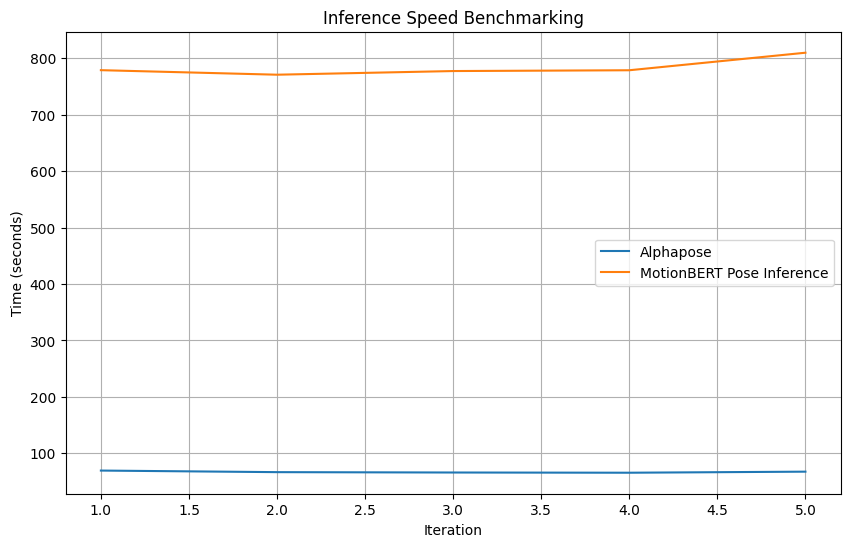

In [ ]:
import os
import time
import matplotlib.pyplot as plt

# Function to perform Alphapose inference
def run_alphapose(vid_ff, alphapose_dir):
    os.chdir(alphapose_dir)
    alphapose_start_time = time.time()
    !python scripts/demo_inference.py --cfg configs/halpe_26/resnet/256x192_res50_lr1e-3_1x.yaml --checkpoint pretrained_models/halpe26_fast_res50_256x192.pth --indir examples/res/vis --video {vid_ff} --save_video
    alphapose_end_time = time.time()
    os.chdir("/content")
    return alphapose_end_time - alphapose_start_time

# Function to perform pose inference with MotionBERT
def run_pose_inference(vid_ff, motionbert_dir):
    os.chdir(motionbert_dir)
    motionbert_start_time = time.time()
    !python infer_wild.py \
    --vid_path {vid_ff} \
    --json_path /content/AlphaPose/examples/res/alphapose-results.json \
    --out_path /content/MHFormer_out
    motionbert_end_time = time.time()
    os.chdir("/content")
    return motionbert_end_time - motionbert_start_time

# Number of iterations for benchmarking
num_iterations = 5

alphapose_dir = "/content/AlphaPose"
motionbert_dir = "/content/MotionBERT"

alphapose_times = []
pose_inference_times = []

for _ in range(num_iterations):
    alphapose_time = run_alphapose(vid_ff, alphapose_dir)
    alphapose_times.append(alphapose_time)
    pose_inference_time = run_pose_inference(vid_ff, motionbert_dir)
    pose_inference_times.append(pose_inference_time)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_iterations + 1), alphapose_times, label='Alphapose')
plt.plot(range(1, num_iterations + 1), pose_inference_times, label='MotionBERT Pose Inference')
plt.xlabel('Iteration')
plt.ylabel('Time (seconds)')
plt.title('Inference Speed Benchmarking')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Save the times into a file
with open("inference_times.txt", "w") as f:
    f.write("Alphapose Times:\n")
    for time_val in alphapose_times:
        f.write(str(time_val) + "\n")

    f.write("\nMotionBERT Pose Inference Times:\n")
    for time_val in pose_inference_times:
        f.write(str(time_val) + "\n")